<a href="https://colab.research.google.com/github/hrk022/EV_Market_Analysis/blob/main/EV_Market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [12]:
df = pd.read_csv("/content/electric_vehicle_charging_station_list.csv")
df.head()

,no,region,address,aux addres,latitude,longitude,type,power,service
0,1,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
1,2,NDMC,"Prithviraj Market, Rabindra Nagar, New Delhi- ...","Electric Vehicle Charger, Prithviraj Market, R...",28.600725,77.226252,DC-001,15 kW,Self Service
2,3,NDMC,"Outside RWA Park, Jor Bagh Market, Jor Bagh Co...","Electric Vehicle Charger, Outside RWA Park, Jo...",28.588303,77.217697,DC-001,15 kW,Self Service
3,4,NDMC,"Opposite Dory Pharmacy, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Dory Pharma...",28.582654,77.220087,DC-001,15 kW,Self Service
4,5,NDMC,"Opposite Goel Opticals, Khanna Market, Aliganj...","Electric Vehicle Charger, Opposite Goel Optica...",28.584485,77.220316,DC-001,15 kW,Self Service


In [38]:
df['type'].unique()

array(['DC-001', 'AC-001', 'CCS/ChADEMO/ Type 2 AC'], dtype=object)

In [13]:
df['power'].unique()

array(['15 kW', '10(3.3 kW each)', '142kW'], dtype=object)

In [18]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df['power_kw'] = df['power'].str.extract(r'(\d+\.?\d*)').astype(float)

In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df.isnull().sum()

,0
no,0
region,0
address,0
aux_addres,0
latitude,0
longitude,0
type,0
power,0
service,0
power_kw,0


In [19]:
df['power_kw'].head(5)

,power_kw
0,15.0
1,15.0
2,15.0
3,15.0
4,15.0


In [20]:
df['power_kw'].unique()

array([ 15.,  10., 142.])

In [21]:
features = df[['region', 'type', 'power_kw']]

In [23]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(features[['region', 'type']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['region', 'type']))

In [24]:
X = pd.concat([encoded_df, features[['power_kw']].reset_index(drop=True)], axis=1)


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

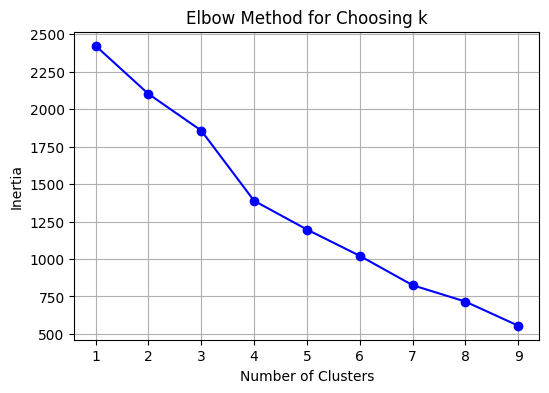

In [28]:
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing k')
plt.grid(True)
plt.show()

In [29]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

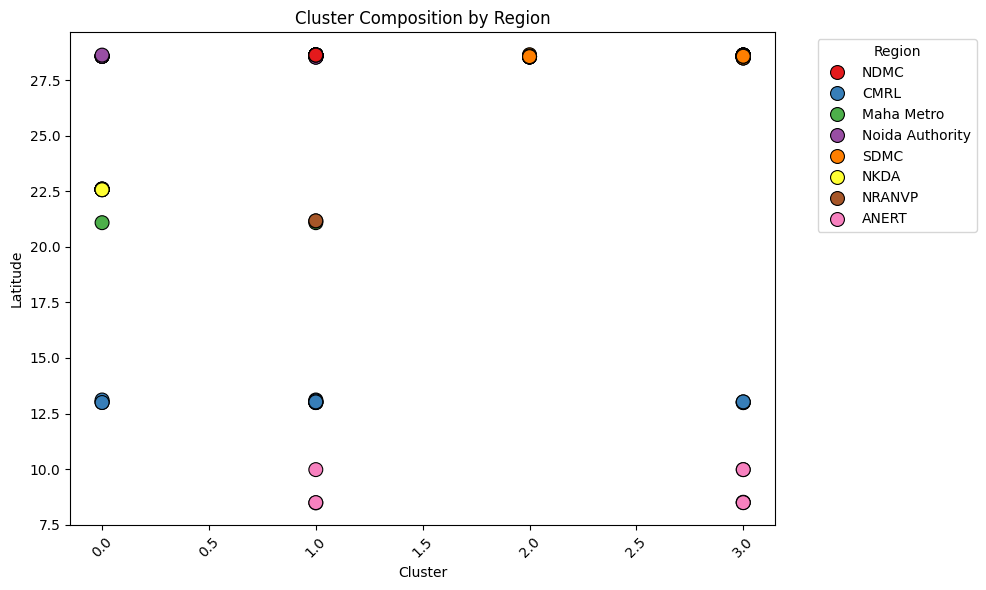

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='cluster', y='latitude', hue='region', palette='Set1', s=100, edgecolor='black')
plt.title("Cluster Composition by Region")
plt.xlabel("Cluster")
plt.ylabel("Latitude")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


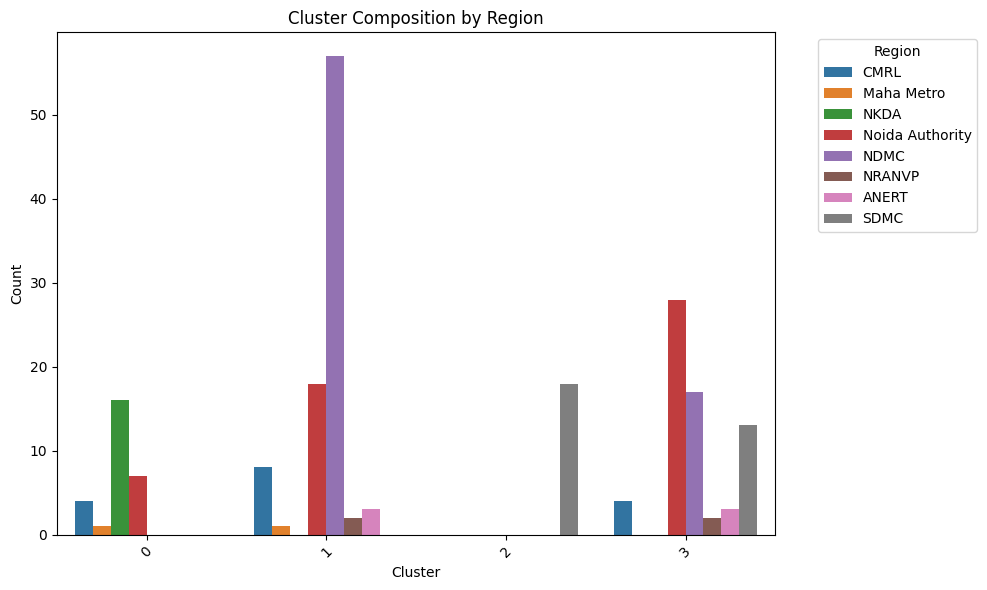

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster', hue='region')
plt.title("Cluster Composition by Region")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<ipython-input-42-3077d30f6b37>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["cluster"], y=df["latitude"], palette="viridis", ax=axes[0, 0])
<ipython-input-42-3077d30f6b37>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["cluster"], y=df["longitude"], palette="viridis", ax=axes[0, 1])
<ipython-input-42-3077d30f6b37>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["cluster"], y=df["power_kw"], palette="viridis", ax=axes[1, 0])
<ipython-input-42-3077d30f6b37>:21: FutureWarning: 

Passing `palette` without assigning `hue`

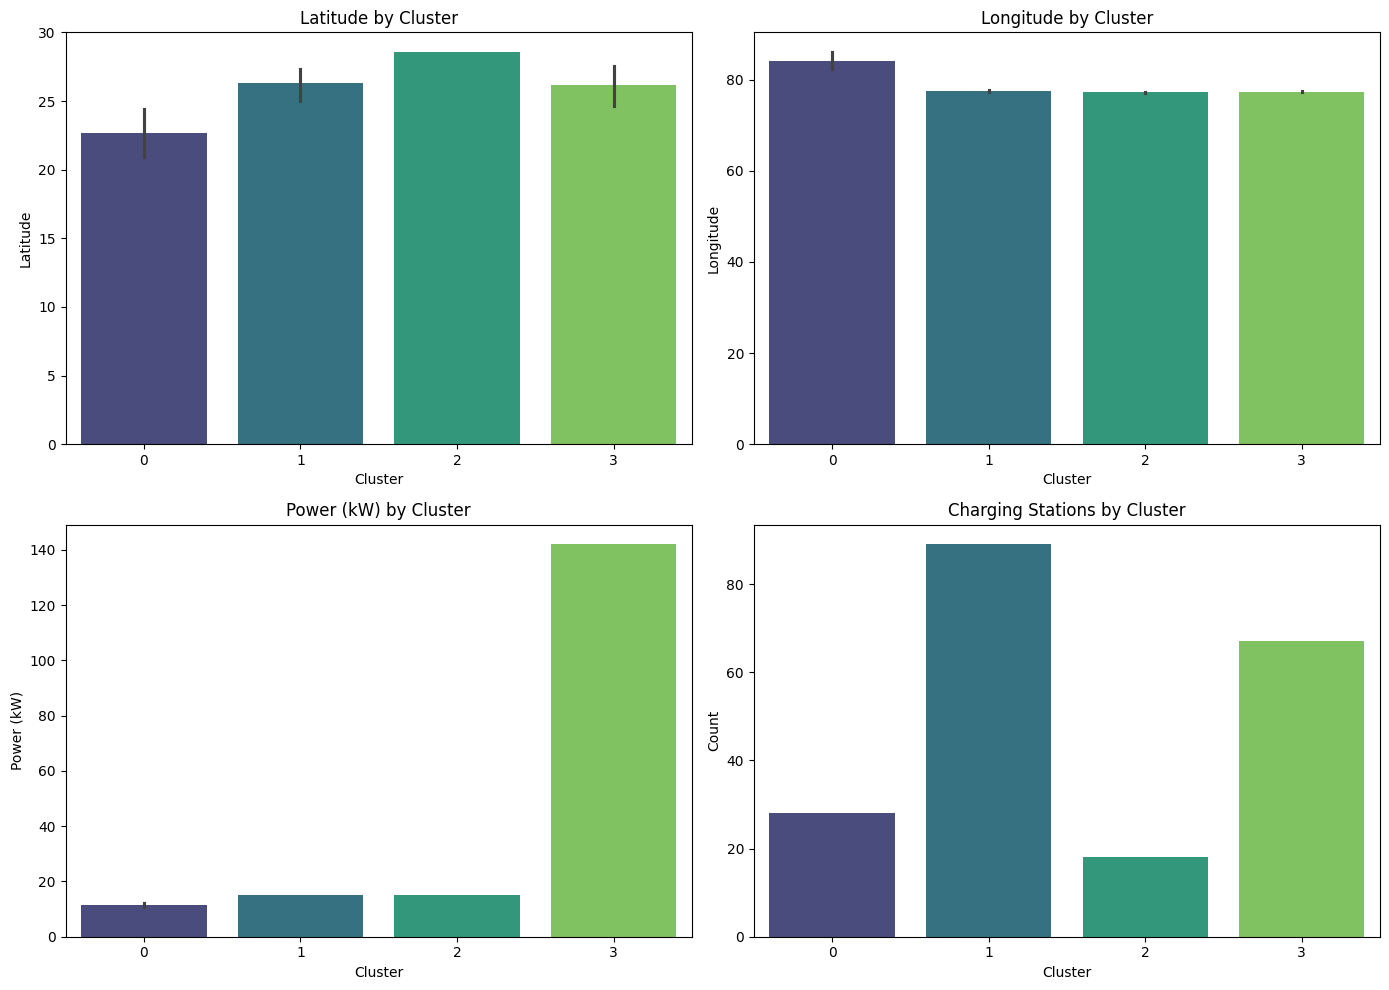

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Latitude by Cluster
sns.barplot(x=df["cluster"], y=df["latitude"], palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Latitude by Cluster")
axes[0, 0].set_xlabel("Cluster")
axes[0, 0].set_ylabel("Latitude")

# Longitude by Cluster
sns.barplot(x=df["cluster"], y=df["longitude"], palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Longitude by Cluster")
axes[0, 1].set_xlabel("Cluster")
axes[0, 1].set_ylabel("Longitude")

# Power (kW) by Cluster
sns.barplot(x=df["cluster"], y=df["power_kw"], palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Power (kW) by Cluster")
axes[1, 0].set_xlabel("Cluster")
axes[1, 0].set_ylabel("Power (kW)")

sns.barplot(x=df["cluster"], y=df["cluster"].map(df["cluster"].value_counts()), palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Charging Stations by Cluster")
axes[1, 1].set_xlabel("Cluster")
axes[1, 1].set_ylabel("Count")

# Adjust layout and display
plt.tight_layout()
plt.show()


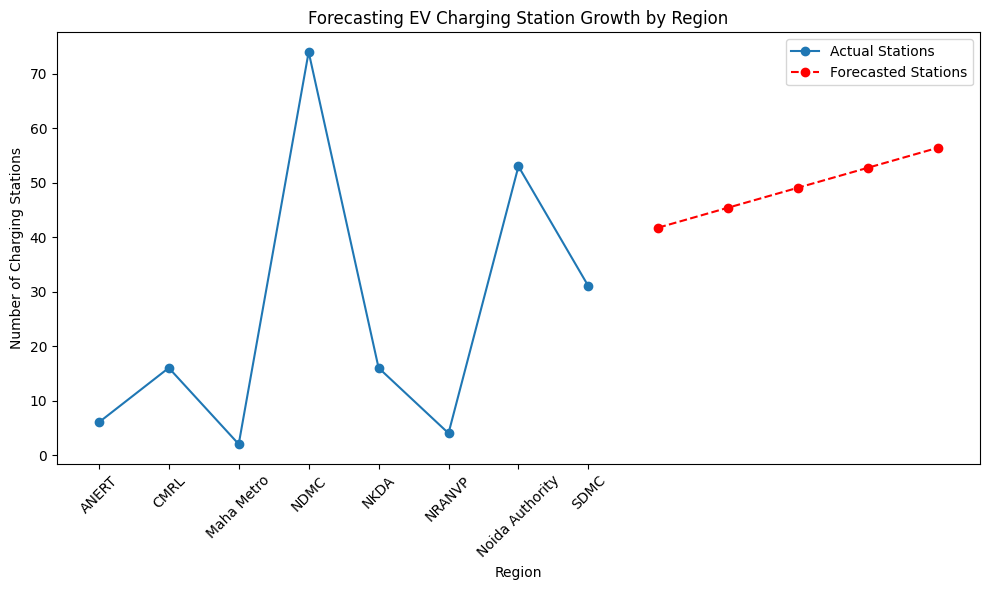

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Step 2: Count stations per region
region_station_counts = df['region'].value_counts().sort_index()
df_region = region_station_counts.reset_index()
df_region.columns = ['region', 'station_count']

# Step 3: Fit Exponential Smoothing model
model = ExponentialSmoothing(df_region['station_count'], trend='add', seasonal=None)
fit_model = model.fit()

# Step 4: Forecast next 5 region entries (you can simulate as future regions or time steps)
forecast_steps = 5
forecast = fit_model.forecast(forecast_steps)

# Step 5: Plot actual + forecasted
plt.figure(figsize=(10, 6))
plt.plot(df_region['region'], df_region['station_count'], marker='o', label='Actual Stations')
plt.plot(range(len(df_region), len(df_region) + forecast_steps), forecast, marker='o',
         linestyle='--', color='red', label='Forecasted Stations')
plt.xlabel('Region')
plt.ylabel('Number of Charging Stations')
plt.title('Forecasting EV Charging Station Growth by Region')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
